# Practica Expectation-Maximization. Mezcla de gaussianas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import itertools
from scipy import linalg

In [2]:
# Generar un conjunto de puntos a partir de 
n_samples = 300
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C), .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

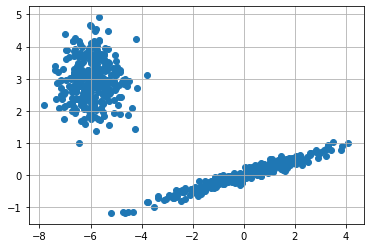

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
plt.show()

In [ ]:
# Esta celda sirve para cargar los datos desde un fichero
X = np.loadtxt('ex2K.txt',delimiter=',')
#Mostrar las dimensiones (n) y el numero de ejemplos (m)
m = X.shape[0]
n = X.shape[1]

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
plt.show()

En lugar de programar el algoritmo desde cero podemos utilizar la implementación que está en la librería scikit-learn. La función se llama  GaussianMixture. Los parámetros son:

n_components = número de clústeres 
covariance_type= 
'full' cada distribución tiene su matriz de covarianzas
'tied' todas las distribuciones comparten una matriz de covarianza general
'diag' cada distribución tiene una matriz de covarianza diagonal 
'spherical' cada distribución tiene una varianza
tol = tolerancia por la cual se fija la convergencia
init=  'random' o  'k-means' 
n_init = número de veces que se ejecuta k-means. Se devuelve la mejor solución de todas
max_iter = número máximo de iteraciones


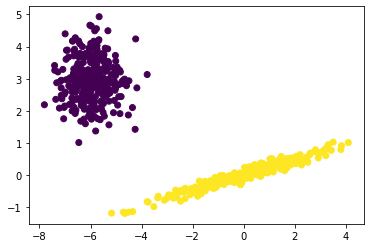

In [4]:
k = 2
init = 'random'
n_init = 20
max_iter = 100
estimator = GaussianMixture(n_components=k, covariance_type='full', n_init =n_init, max_iter=max_iter, random_state=0)
estimator.fit(X)

y_pred = estimator.predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred)
plt.show()

Podemos ver los parámetros de las distribuciones que ha encontrado el algoritmo EM:

In [8]:
print("El peso de cada distribución es:", estimator.weights_)
print("La media de cada distribución es:", estimator.means_)
print("La matriz de covarianzas de cada distribución es:", estimator.covariances_)

El peso de cada distribución es: [0.5 0.5]
La media de cada distribución es: [[-5.95661795e+00  2.97278598e+00]
 [-4.15421256e-02 -1.22816650e-03]]
La matriz de covarianzas de cada distribución es: [[[0.43012901 0.00321558]
  [0.00321558 0.45331313]]

 [[2.86218247 0.67289659]
  [0.67289659 0.16841633]]]


Mejor, vamos a ver las distribuciones sobreimpresionadas a los datos. La siguiente función dibuja unas elipses para representar las distribuciones gaussianas.

In [6]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.title(title)

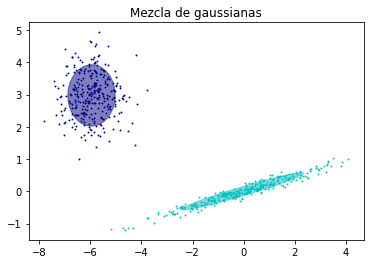

In [7]:
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold', 'darkorange'])
plot_results(X, estimator.predict(X), estimator.means_, estimator.covariances_, 0, 'Mezcla de gaussianas')
plt.show()

Utiliza este script para comprobar los diferentes clusteres obtenidos con los los diferentes tipos de covarianzas (full, tied, diag) en los conjuntos de datos (ex2k, ex3k, ex4k, etc.) e interpreta las soluciones que has obtenido.